<font size=+1 color='Black'><b>Maheshvaran_S&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;205229119</b></font>

In [1]:
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
import warnings
warnings.filterwarnings('ignore')

In [7]:
filename='map1.wav'

In [8]:
import IPython.display as ipd
import librosa
import librosa.display
import numpy as np

In [9]:
plt.figure(figsize=(14,5))
data,sample_rate=librosa.load(filename)
librosa.display.waveplot(data,sr=sample_rate)
ipd.Audio(filename)

NoBackendError: 

<Figure size 1008x360 with 0 Axes>

In [6]:
sample_rate

22050

In [7]:
data

array([ 9.5191234e-07, -9.9657916e-07,  1.0160486e-06, ...,
       -6.6428975e-04, -3.3015956e-04,  0.0000000e+00], dtype=float32)

In [8]:
audio_file_path='King.wav'
librosa_audio_data,librosa_sample_rate=librosa.load(audio_file_path)

In [9]:
print(librosa_audio_data)

[ 9.5191234e-07 -9.9657916e-07  1.0160486e-06 ... -6.6428975e-04
 -3.3015956e-04  0.0000000e+00]


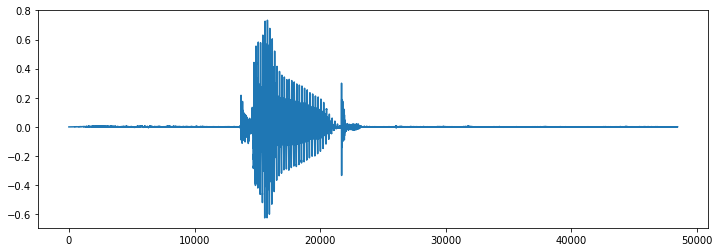

In [10]:
### Lets plot the librosa audio data
import matplotlib.pyplot as plt
# Original audio with 1 channel 
plt.figure(figsize=(12, 4))
plt.plot(librosa_audio_data)

In [11]:
stftt = librosa.feature.chroma_stft(y=librosa_audio_data,sr=librosa_sample_rate)
stftt.shape

(12, 95)

In [12]:
stftt

array([[0.850881  , 1.        , 0.5964047 , ..., 0.70877534, 0.6001311 ,
        0.6572035 ],
       [0.7939969 , 0.7052832 , 0.59942293, ..., 0.5544599 , 0.44412   ,
        0.53427106],
       [0.65794945, 0.7094926 , 0.7974905 , ..., 0.58907926, 0.4927989 ,
        0.52238405],
       ...,
       [0.5376956 , 0.4989347 , 0.44653356, ..., 0.6957192 , 0.6581848 ,
        0.97932434],
       [0.6210133 , 0.50920385, 0.35659295, ..., 0.7932208 , 0.77176887,
        0.8030856 ],
       [0.9757888 , 0.7293841 , 0.42706576, ..., 0.92140365, 0.7621159 ,
        0.74304044]], dtype=float32)

### Metadata of audio files

In [13]:
import pandas as pd
import os
import librosa

audio_dataset_path='Audio/'
metadata=pd.read_csv('metadata.csv')
metadata.head()

,file_name,fold,classID,class
0,Ball.wav,1,0,Ball
1,Ball2.wav,2,0,Ball
2,Ball3.wav,3,0,Ball
3,Bat.wav,1,1,Bat
4,Bat2.wav,2,1,Bat


In [14]:
def features_extractor(file):
    audio, sample_rate = librosa.load(file_name) 
    stftt_features = librosa.feature.chroma_stft(y=audio, sr=sample_rate) 
    stftt_scaled_features = np.mean(stftt_features.T,axis=0)
    
    return stftt_scaled_features

In [15]:
import numpy as np
from tqdm import tqdm

### Now we iterate through every audio file and extract features 
extracted_features=[]
for index_num,row in tqdm(metadata.iterrows()):
    file_name = os.path.join(os.path.abspath(audio_dataset_path),'fold'+str(row["fold"])+'/',str(row["file_name"]))
    final_class_labels=row["class"]
    data=features_extractor(file_name)
    extracted_features.append([data,final_class_labels])

81it [00:09,  8.76it/s]


In [16]:
### converting extracted_features to Pandas dataframe
extracted_features_df=pd.DataFrame(extracted_features,columns=['feature','class'])
extracted_features_df.head()

,feature,class
0,"[0.47419375, 0.54542816, 0.5569351, 0.59582436...",Ball
1,"[0.7114438, 0.5962939, 0.43509597, 0.40806141,...",Ball
2,"[0.59230554, 0.5296657, 0.55337155, 0.51659024...",Ball
3,"[0.39866382, 0.39402232, 0.5022452, 0.7043231,...",Bat
4,"[0.71370333, 0.54893094, 0.4553162, 0.4185747,...",Bat


In [17]:
### Split the dataset into independent and dependent dataset
X=np.array(extracted_features_df['feature'].tolist())
y=np.array(extracted_features_df['class'].tolist())

In [18]:
X.shape

(81, 12)

In [40]:
y.shape

(81, 27)

In [19]:
y

array(['Ball', 'Ball', 'Ball', 'Bat', 'Bat', 'Bat', 'Bed', 'Bed', 'Bed',
       'Call', 'Call', 'Call', 'Cat', 'Cat', 'Cat', 'Chalk', 'Chalk',
       'Chalk', 'Cook', 'Cook', 'Cook', 'Cow', 'Cow', 'Cow', 'Ding',
       'Ding', 'Ding', 'Dong', 'Dong', 'Dong', 'Gun', 'Gun', 'Gun',
       'Hill', 'Hill', 'Hill', 'Hook', 'Hook', 'Hook', 'How', 'How',
       'How', 'King', 'King', 'King', 'Kite', 'Kite', 'Kite', 'Lap',
       'Lap', 'Lap', 'Map', 'Map', 'Map', 'Pet', 'Pet', 'Pet', 'Ping',
       'Ping', 'Ping', 'Pong', 'Pong', 'Pong', 'Red', 'Red', 'Red',
       'Right', 'Right', 'Right', 'Rock', 'Rock', 'Rock', 'Sing', 'Sing',
       'Sing', 'Will', 'Will', 'Will', 'Won', 'Won', 'Won'], dtype='<U5')

In [20]:
from tensorflow.keras.utils import to_categorical
from sklearn.preprocessing import LabelEncoder
labelencoder=LabelEncoder()
y=to_categorical(labelencoder.fit_transform(y))

In [21]:
y

array([[1., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 1.],
       [0., 0., 0., ..., 0., 0., 1.],
       [0., 0., 0., ..., 0., 0., 1.]], dtype=float32)

In [60]:
### Train Test Split
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.25,random_state=0)

In [61]:
X_train.shape

(60, 12)

In [62]:
X_test.shape

(21, 12)

In [63]:
y_train.shape

(60, 27)

In [64]:
y_test.shape

(21, 27)

## Model creation

In [65]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Dropout,Activation,Flatten
from tensorflow.keras.optimizers import Adam
from sklearn import metrics

In [66]:
### No of classes
num_labels=y.shape[1]

In [67]:
model=Sequential()
# input layer
model.add(Dense(128, activation='relu', input_shape=(12,)))
# 1st hidden layer
model.add(Dense(64, activation='relu'))
# 2nd hidden layer
model.add(Dense(32, activation='relu'))
### output layer
model.add(Dense(num_labels, activation='softmax'))

In [68]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_6 (Dense)              (None, 128)               1664      
_________________________________________________________________
dense_7 (Dense)              (None, 64)                8256      
_________________________________________________________________
dense_8 (Dense)              (None, 32)                2080      
_________________________________________________________________
dense_9 (Dense)              (None, 27)                891       
Total params: 12,891
Trainable params: 12,891
Non-trainable params: 0
_________________________________________________________________


In [69]:
model.compile(loss='categorical_crossentropy',metrics=['accuracy'],optimizer='adam')

In [70]:
## Trianing my model
num_epochs = 100
num_batch_size = 32

model.fit(X_train, y_train, batch_size=num_batch_size, epochs=num_epochs, verbose=1)

Epoch 1/200
2/2 [==============================] - 0s 5ms/step - loss: 3.3064 - accuracy: 0.0167
Epoch 2/200
2/2 [==============================] - 0s 7ms/step - loss: 3.2977 - accuracy: 0.0333
Epoch 3/200
2/2 [==============================] - 0s 6ms/step - loss: 3.2887 - accuracy: 0.0333
Epoch 4/200
2/2 [==============================] - 0s 5ms/step - loss: 3.2848 - accuracy: 0.0500
Epoch 5/200
2/2 [==============================] - 0s 6ms/step - loss: 3.2822 - accuracy: 0.0500
Epoch 6/200
2/2 [==============================] - 0s 6ms/step - loss: 3.2799 - accuracy: 0.0500
Epoch 7/200
2/2 [==============================] - 0s 6ms/step - loss: 3.2775 - accuracy: 0.0500
Epoch 8/200
2/2 [==============================] - 0s 6ms/step - loss: 3.2760 - accuracy: 0.0500
Epoch 9/200
2/2 [==============================] - 0s 5ms/step - loss: 3.2732 - accuracy: 0.0500
Epoch 10/200
2/2 [==============================] - 0s 4ms/step - loss: 3.2714 - accuracy: 0.0500
Epoch 11/200
2/2 [===========

In [71]:
test_accuracy=model.evaluate(X_test,y_test,verbose=1)
print(test_accuracy)

1/1 [==============================] - 0s 108ms/step - loss: 5.4539 - accuracy: 0.0000e+00
[5.4538750648498535, 0.0]


In [72]:
X_test[1]

array([0.45003197, 0.43353128, 0.51769763, 0.64664537, 0.56894386,
       0.4288557 , 0.44747046, 0.526228  , 0.6013826 , 0.5985447 ,
       0.55012625, 0.48415133], dtype=float32)

In [73]:
model.predict_classes(X_test)

array([ 1, 24, 22, 26,  2, 15, 12, 13,  5,  5, 26, 17, 24,  2, 12, 26,  4,
       26,  5,  4, 17], dtype=int64)

### Testing on same class but with different voice modulation

In [80]:
filename="Won.wav"
audio, sample_rate = librosa.load(filename) 
    
stftt_features = librosa.feature.chroma_stft(y=audio, sr=sample_rate) 

stftt_scaled_features = np.mean(stftt_features.T,axis=0)

print(stftt_features)
stftt_scaled_features=stftt_scaled_features.reshape(1,-1)
print(stftt_scaled_features)
print(stftt_features.shape)
predicted_label=model.predict_classes(stftt_scaled_features)
print(predicted_label)
prediction_class = labelencoder.inverse_transform(predicted_label) 
prediction_class

[[0.5551215  0.4466221  0.61528337 ... 0.9311121  0.8970517  0.72995895]
 [0.74985915 0.5309912  0.6422719  ... 0.8564866  0.7407433  0.81832516]
 [1.         0.73446035 0.7765502  ... 0.8568165  0.88508844 0.9242028 ]
 ...
 [0.68859786 0.6828675  1.         ... 0.6728783  0.6594315  0.63538057]
 [0.5516782  0.5760547  0.9168005  ... 0.90739137 0.8040265  0.52073735]
 [0.6134756  0.5197195  0.68937457 ... 1.         1.         0.6187291 ]]
[[0.5901624  0.5981147  0.55726826 0.5602799  0.60791516 0.6068296
  0.55147666 0.56204355 0.6298304  0.6737457  0.63166976 0.59947985]]
(12, 93)
[12]


array(['Hook'], dtype='<U5')